In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [90]:
# Loading database

titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [92]:
# Dropping duplicate datas.

titanic = titanic.drop_duplicates()
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [94]:
# Even applying drop_duplicate, the number of lines remains the same
# So, we need to make the index keep track of the number of data

titanic.reset_index(drop=True, inplace=True)

In [96]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
780,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
781,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
782,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [98]:
# This module doesnt support missing datas. Now we'll are see how many missing datas we have.

percentage_nan = (titanic.isnull().sum() / len(titanic)) * 100
percentage_nan

survived        0.000000
pclass          0.000000
sex             0.000000
age            13.520408
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.255102
class           0.000000
who             0.000000
adult_male      0.000000
deck           74.234694
embark_town     0.255102
alive           0.000000
alone           0.000000
dtype: float64

In [100]:
# Dropping all columns that have, at least, one null data.

titanic_dropna = titanic.dropna(axis=1)
titanic_dropna.shape

(784, 11)

In [102]:
# The scikit-learn implementation does not support binned variables
# We need to transform the categorized data into dummie data
# But, firstly, i'll drop the columns that have the same informations, such SURVIVED and ALIVE

survived = titanic_dropna.survived.value_counts()
alive = titanic_dropna.alive.value_counts()

print(f'For survived, we have \n {survived}')
print('\n')
print(f'For alive, we have \n {alive}')

For survived, we have 
 survived
0    461
1    323
Name: count, dtype: int64


For alive, we have 
 alive
no     461
yes    323
Name: count, dtype: int64


In [104]:
# I will dropping anyone column.

titanic_dropna = titanic_dropna.drop('alive', axis=1)

In [106]:
titanic_dropna

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alone
0,0,3,male,1,0,7.2500,Third,man,True,False
1,1,1,female,1,0,71.2833,First,woman,False,False
2,1,3,female,0,0,7.9250,Third,woman,False,True
3,1,1,female,1,0,53.1000,First,woman,False,False
4,0,3,male,0,0,8.0500,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,0,5,29.1250,Third,woman,False,False
780,1,1,female,0,0,30.0000,First,woman,False,True
781,0,3,female,1,2,23.4500,Third,woman,False,False
782,1,1,male,0,0,30.0000,First,man,True,True


In [108]:
titanic_dropna = titanic_dropna.drop('pclass', axis=1)

In [110]:
titanic_dropna

,survived,sex,sibsp,parch,fare,class,who,adult_male,alone
0,0,male,1,0,7.2500,Third,man,True,False
1,1,female,1,0,71.2833,First,woman,False,False
2,1,female,0,0,7.9250,Third,woman,False,True
3,1,female,1,0,53.1000,First,woman,False,False
4,0,male,0,0,8.0500,Third,man,True,True
...,...,...,...,...,...,...,...,...,...
779,0,female,0,5,29.1250,Third,woman,False,False
780,1,female,0,0,30.0000,First,woman,False,True
781,0,female,1,2,23.4500,Third,woman,False,False
782,1,male,0,0,30.0000,First,man,True,True


In [112]:
# Transforming in dummies

titanic_encoded = pd.get_dummies(titanic_dropna
                                 , columns=['class','who']
                                 , drop_first=True
                                )
titanic_encoded

,survived,sex,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,male,1,0,7.2500,True,False,False,True,True,False
1,1,female,1,0,71.2833,False,False,False,False,False,True
2,1,female,0,0,7.9250,False,True,False,True,False,True
3,1,female,1,0,53.1000,False,False,False,False,False,True
4,0,male,0,0,8.0500,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
779,0,female,0,5,29.1250,False,False,False,True,False,True
780,1,female,0,0,30.0000,False,True,False,False,False,True
781,0,female,1,2,23.4500,False,False,False,True,False,True
782,1,male,0,0,30.0000,True,True,False,False,True,False


In [114]:
# We need change the columns sex, adult_male and alone.
# For sex, i will apply the function map.
# For adult_male and alone, i will use astype.

titanic_encoded.dtypes

survived          int64
sex              object
sibsp             int64
parch             int64
fare            float64
adult_male         bool
alone              bool
class_Second       bool
class_Third        bool
who_man            bool
who_woman          bool
dtype: object

In [116]:
titanic_encoded[['adult_male', 'alone']] = titanic_encoded[['adult_male', 'alone']].astype(int)

titanic_encoded.dtypes

survived          int64
sex              object
sibsp             int64
parch             int64
fare            float64
adult_male        int32
alone             int32
class_Second       bool
class_Third        bool
who_man            bool
who_woman          bool
dtype: object

In [118]:
titanic_encoded = titanic_encoded.drop('sex', axis=1)

In [120]:
titanic_encoded

,survived,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,1,0,7.2500,1,0,False,True,True,False
1,1,1,0,71.2833,0,0,False,False,False,True
2,1,0,0,7.9250,0,1,False,True,False,True
3,1,1,0,53.1000,0,0,False,False,False,True
4,0,0,0,8.0500,1,1,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
779,0,0,5,29.1250,0,0,False,True,False,True
780,1,0,0,30.0000,0,1,False,False,False,True
781,0,1,2,23.4500,0,0,False,True,False,True
782,1,0,0,30.0000,1,1,False,False,True,False


In [122]:
titanic_encoded['sex'] = titanic_dropna['sex']

In [124]:
titanic_encoded['sex'].unique

<bound method Series.unique of 0        male
1      female
2      female
3      female
4        male
        ...  
779    female
780    female
781    female
782      male
783      male
Name: sex, Length: 784, dtype: object>

In [126]:
titanic_encoded.sex = titanic_encoded.sex.map({'female': 1
                                               , 'male': 0})

In [128]:
# Now I will separate the explanatory variables from the target.

y_target = titanic_encoded['survived']
x_explanatory = titanic_encoded.drop('survived', axis=1)

In [130]:
y_target

0      0
1      1
2      1
3      1
4      0
      ..
779    0
780    1
781    0
782    1
783    0
Name: survived, Length: 784, dtype: int64

In [132]:
x_explanatory

,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman,sex
0,1,0,7.2500,1,0,False,True,True,False,0
1,1,0,71.2833,0,0,False,False,False,True,1
2,0,0,7.9250,0,1,False,True,False,True,1
3,1,0,53.1000,0,0,False,False,False,True,1
4,0,0,8.0500,1,1,False,True,True,False,0
...,...,...,...,...,...,...,...,...,...,...
779,0,5,29.1250,0,0,False,True,False,True,1
780,0,0,30.0000,0,1,False,False,False,True,1
781,1,2,23.4500,0,0,False,True,False,True,1
782,0,0,30.0000,1,1,False,False,True,False,0


In [134]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [136]:
x_explanatory

,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman,sex
0,1,0,7.2500,1,0,False,True,True,False,0
1,1,0,71.2833,0,0,False,False,False,True,1
2,0,0,7.9250,0,1,False,True,False,True,1
3,1,0,53.1000,0,0,False,False,False,True,1
4,0,0,8.0500,1,1,False,True,True,False,0
...,...,...,...,...,...,...,...,...,...,...
779,0,5,29.1250,0,0,False,True,False,True,1
780,0,0,30.0000,0,1,False,False,False,True,1
781,1,2,23.4500,0,0,False,True,False,True,1
782,0,0,30.0000,1,1,False,False,True,False,0


In [138]:
clf = clf.fit(x_explanatory[['adult_male']], y_target)

In [140]:
x_explanatory.adult_male.value_counts()

adult_male
1    451
0    333
Name: count, dtype: int64

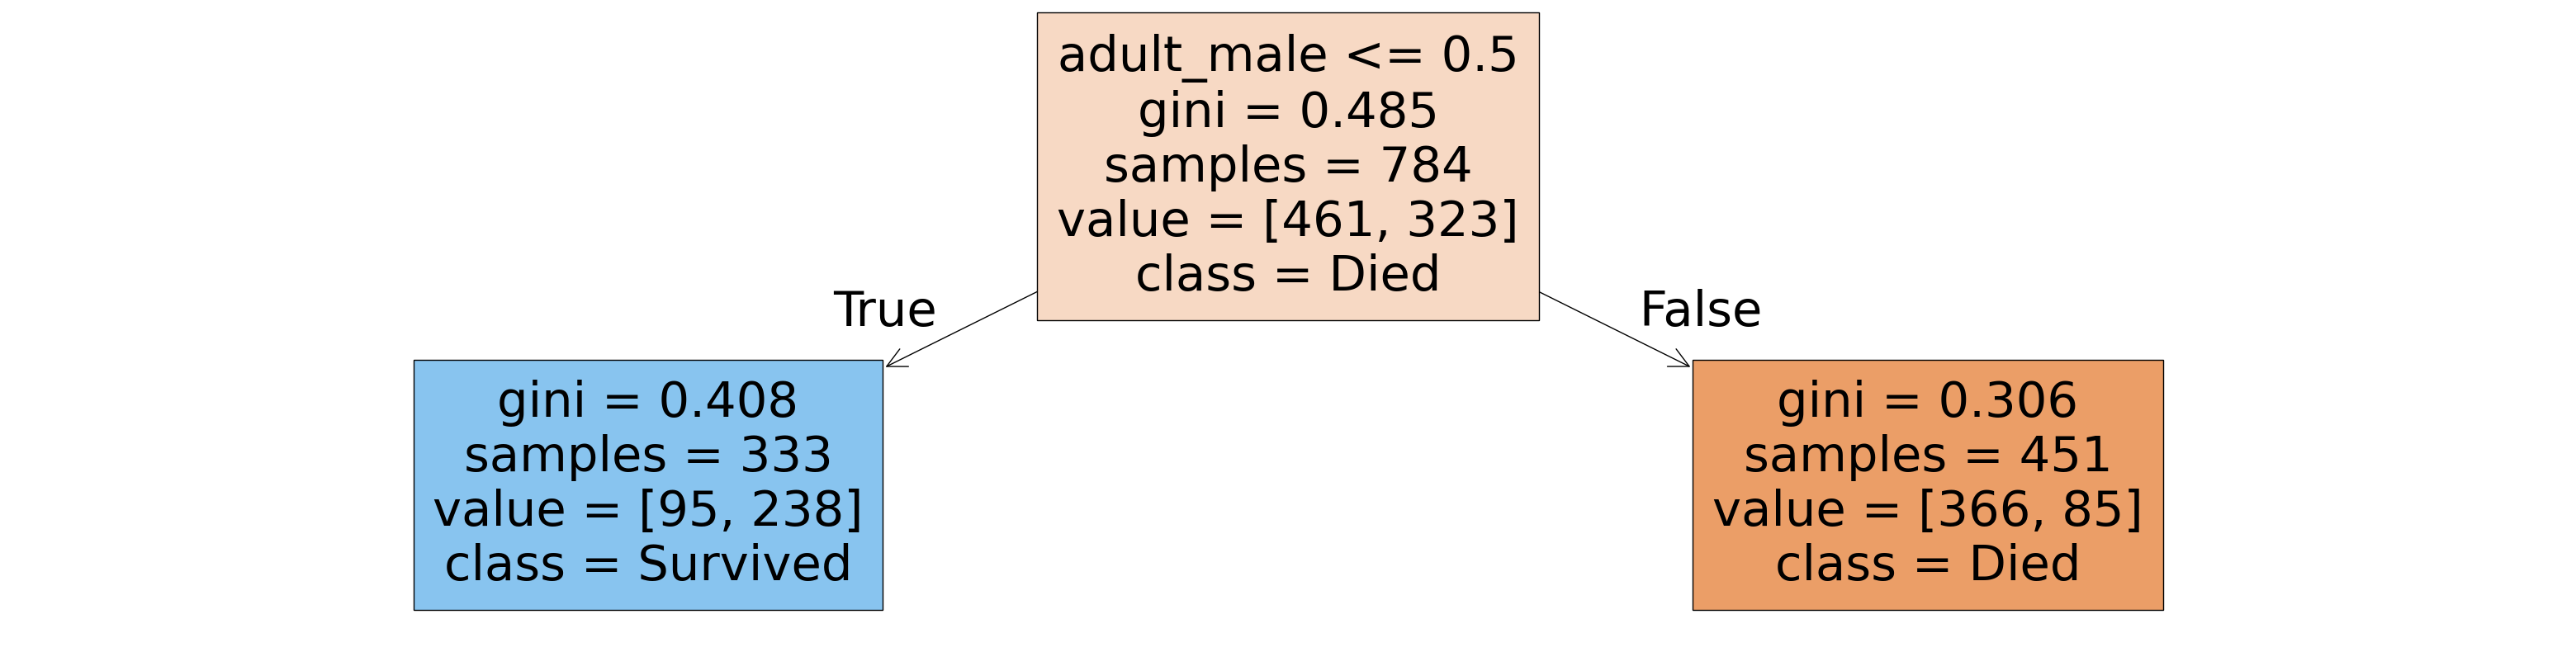

In [142]:
plt.figure(figsize=(40, 10))
plot_tree(clf,
          filled=True,
          class_names=['Died', 'Survived'],
          feature_names=['adult_male']);

# GINI = function for measure break quality

In [144]:
# Formule for Gini is: 1 - [(yes/total)**2 - (no/total)**2]

print('Gini of root is: ', 1 - (323/784)**2 - (461/784)**2)
print('Gini of left is: ', 1 - (238/333)**2 - (95/333)**2)
print('Gini of right is: ', 1 - (85/451)**2 - (366/451)**2)

Gini of root is:  0.48450840795501876
Gini of left is:  0.40779518256995734
Gini of right is:  0.30589820109045673


In [146]:
# Tree of classification with two variables flags

clf = clf.fit(x_explanatory[['adult_male','class_Third']],y_target)
clf

DecisionTreeClassifier(random_state=100)

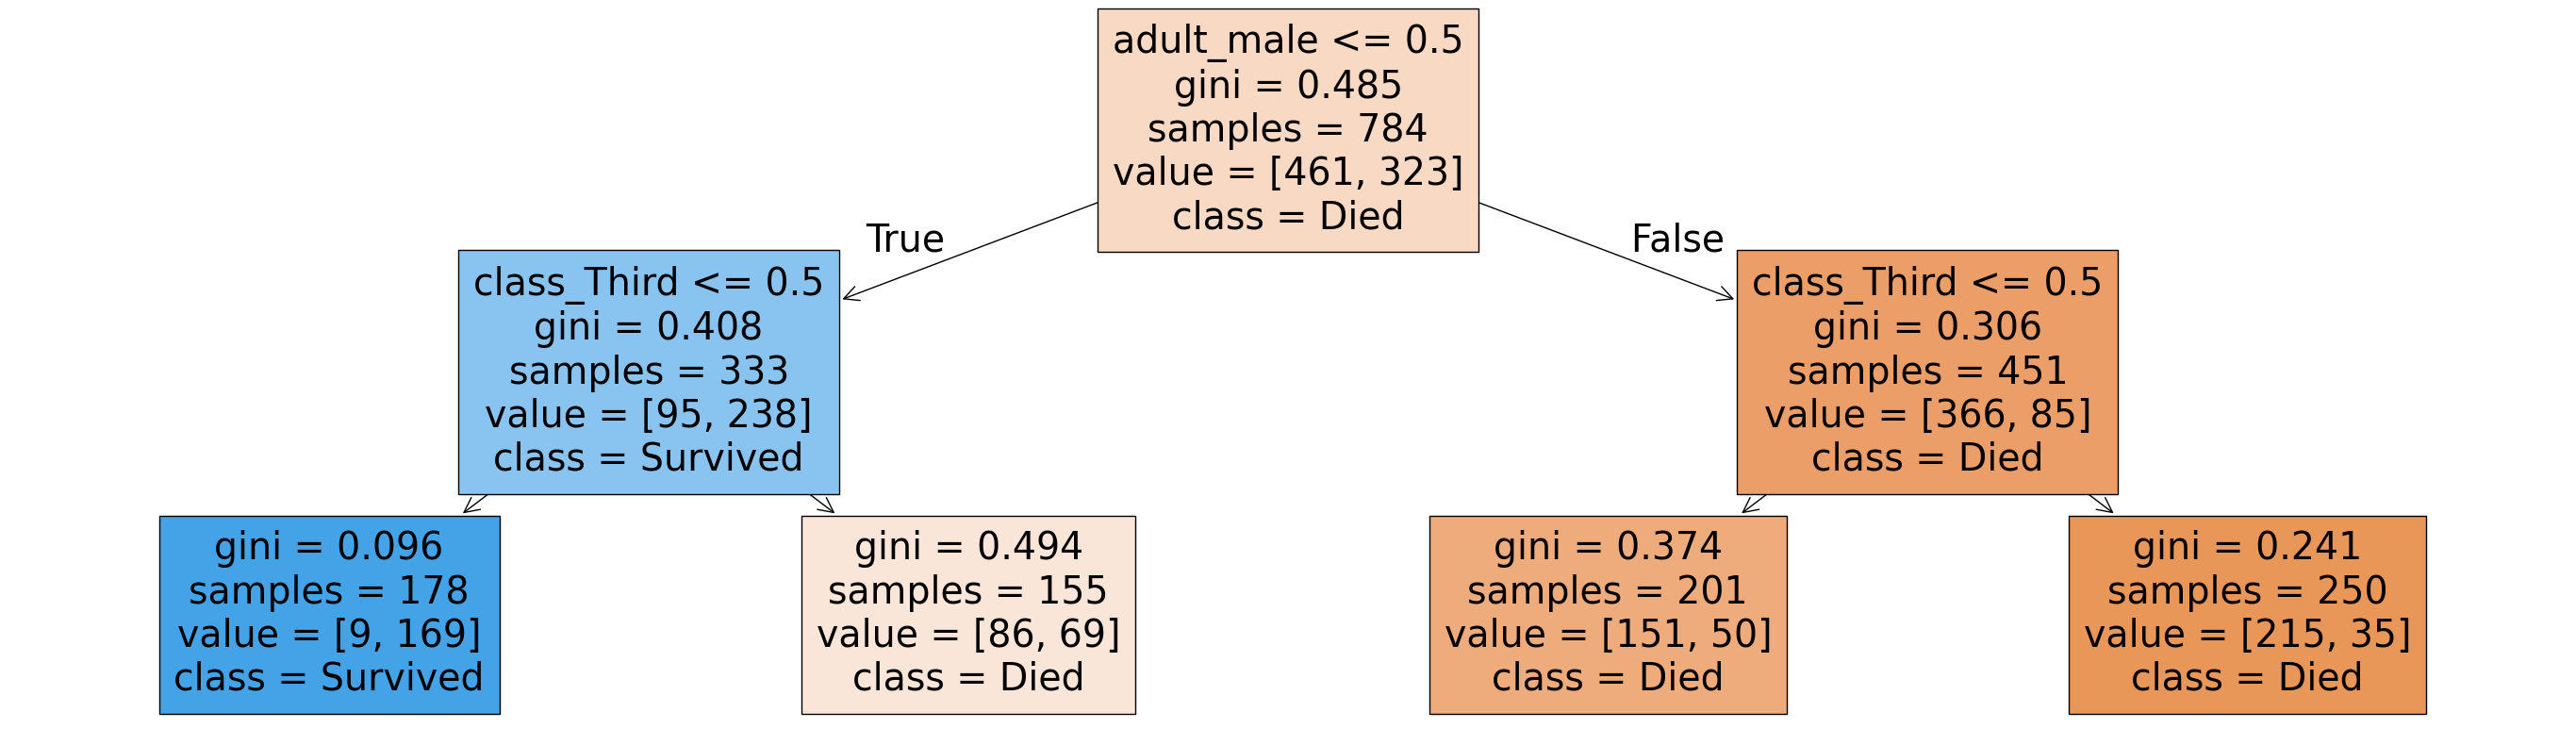

In [148]:
plt.figure(figsize=(35, 10))
plot_tree(clf,
          filled=True,
          class_names=['Died', 'Survived'],
          feature_names=['adult_male', 'class_Third']);


In [150]:
# Overfitting

x1 = np.array([10,22,13,42,25,36,24])
x2 = np.array([100,200,300,400,500,600,400])
y = np.array([0,0,0,1,0,1,1])

In [152]:
teste = pd.DataFrame({'x1': x1, 'x2':x2})

In [154]:
teste

,x1,x2
0,10,100
1,22,200
2,13,300
3,42,400
4,25,500
5,36,600
6,24,400


In [156]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [158]:
clf = clf.fit(teste,y)
clf

DecisionTreeClassifier(random_state=100)

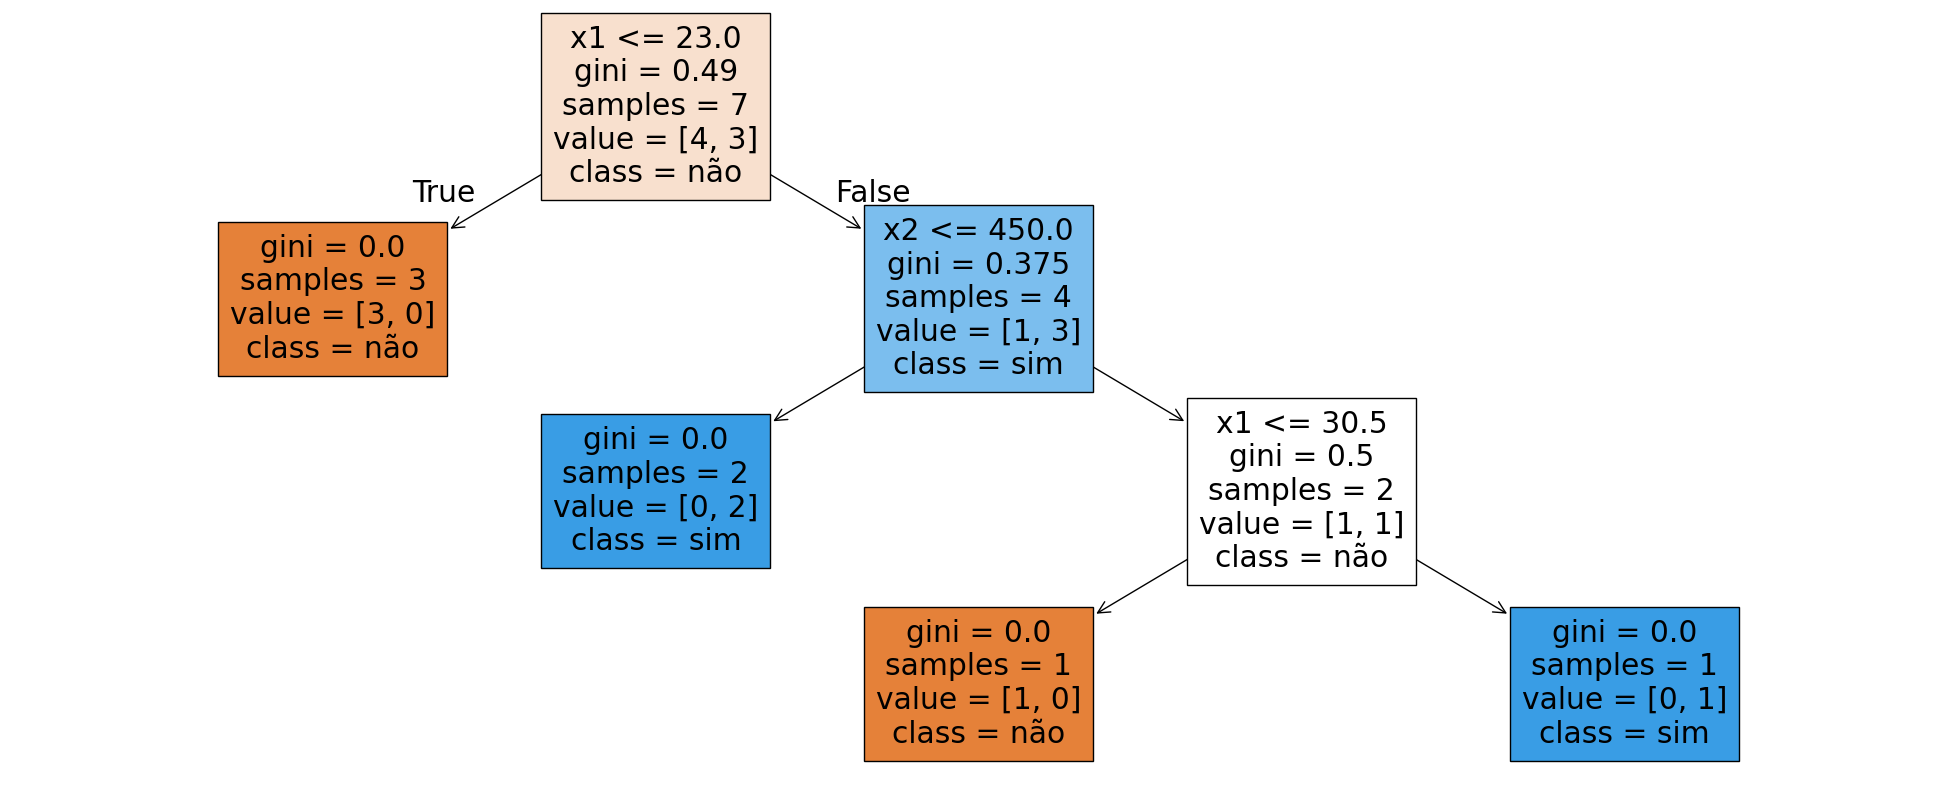

In [160]:
plt.figure(figsize=(25,10))
plot_tree(clf,
          filled=True,
          class_names=['não', 'sim'],
          feature_names=['x1', 'x2']);

In [164]:
# Tree of classification with all variables

x_explanatory

,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman,sex
0,1,0,7.2500,1,0,False,True,True,False,0
1,1,0,71.2833,0,0,False,False,False,True,1
2,0,0,7.9250,0,1,False,True,False,True,1
3,1,0,53.1000,0,0,False,False,False,True,1
4,0,0,8.0500,1,1,False,True,True,False,0
...,...,...,...,...,...,...,...,...,...,...
779,0,5,29.1250,0,0,False,True,False,True,1
780,0,0,30.0000,0,1,False,False,False,True,1
781,1,2,23.4500,0,0,False,True,False,True,1
782,0,0,30.0000,1,1,False,False,True,False,0


In [168]:
clf = clf.fit(x_explanatory,y_target)
clf

DecisionTreeClassifier(random_state=100)

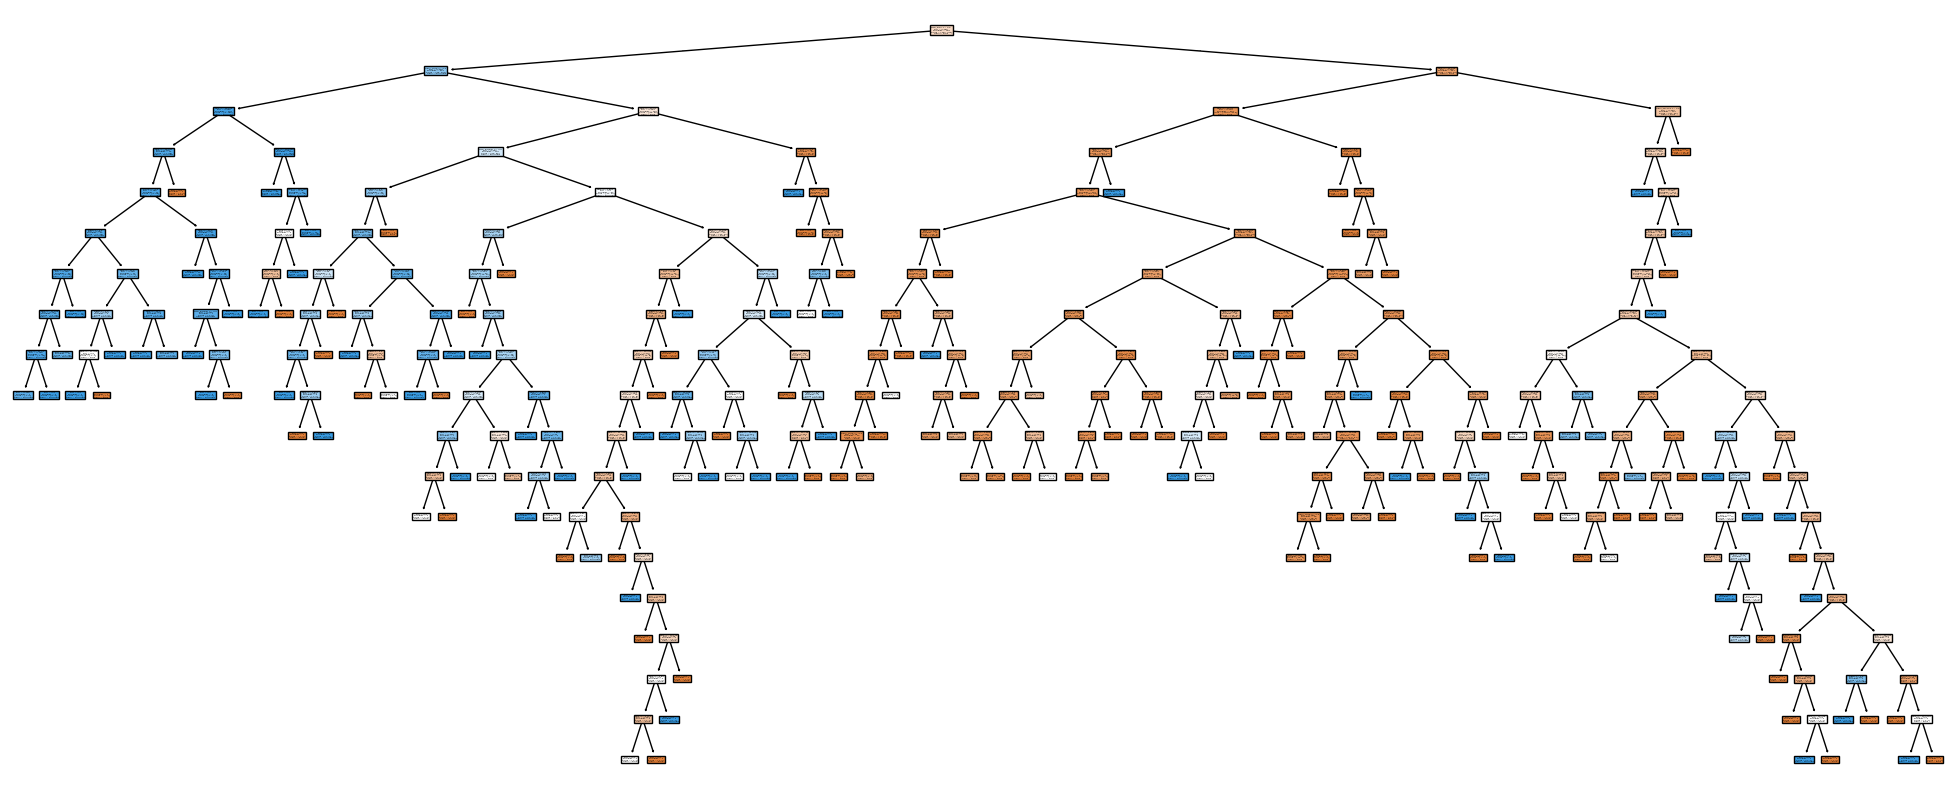

In [176]:
plt.figure(figsize=(25,10))
plot_tree(clf,
          filled=True,
          class_names=['Died', 'Survived'],
          feature_names=list(x_explanatory.columns));

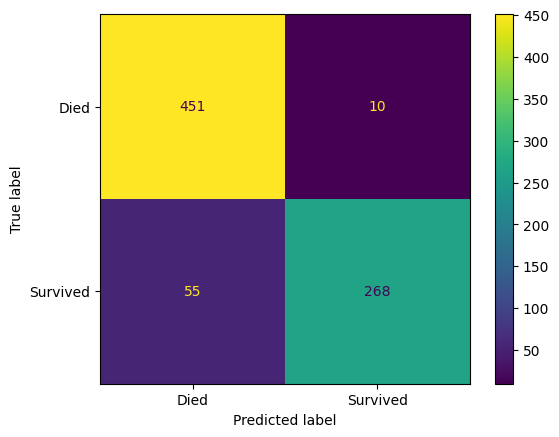

In [182]:
# Verifying the accuracy

ConfusionMatrixDisplay.from_estimator(clf, x_explanatory, y_target, display_labels=['Died', 'Survived']);

In [184]:
predict = clf.predict(x_explanatory)

In [196]:
acc_tree = round(accuracy_score(y_target, predict)*100)

print(f'The accuracy of this tree its {acc_tree}%.')

The accuracy of this tree its 92%.


In [230]:
# For a better accuracy, i'll separate the tree in TRAIN and TEST

x_train, x_test, y_train, y_test = train_test_split(x_explanatory, y_target, 
                                                    test_size=0.3, 
                                                    random_state=100)

# x_explanatory, y_target = dataset
# test_size = percentual for test
# random_state = to get the same result

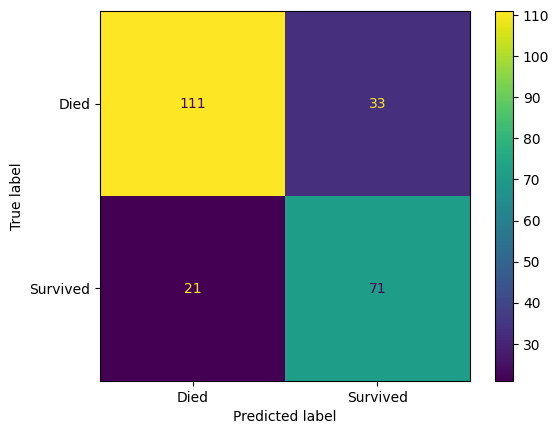

In [234]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)
ConfusionMatrixDisplay.from_estimator(clf, 
                                      x_test, y_test, 
                                      display_labels=['Died', 'Survived']);

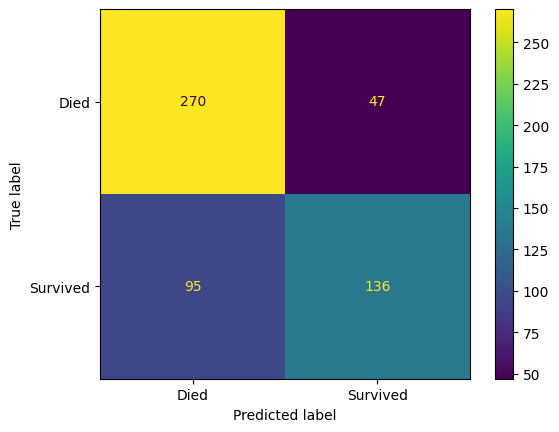

In [240]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_test, y_test)
predict_train = clf.predict(x_train)
ConfusionMatrixDisplay.from_estimator(clf, 
                                      x_train, y_train, 
                                      display_labels=['Died', 'Survived']);

In [242]:
test_accuracy = round(accuracy_score(y_test, predict)*100)
train_accuracy = round(accuracy_score(y_train, predict_train)*100)

print(f'The accuracy of test its {test_accuracy}%.')
print(f'The accuracy of train its {train_accuracy}%.')

The accuracy of test its 77%.
The accuracy of train its 74%.


In [252]:
# Pre puning

clf = DecisionTreeClassifier(max_depth=2,
                             random_state=100,
                             min_samples_leaf=80)
clf = clf.fit(x_train,y_train)
predict = clf.predict(x_test)
accuracy_score(y_test, predict)

0.7923728813559322

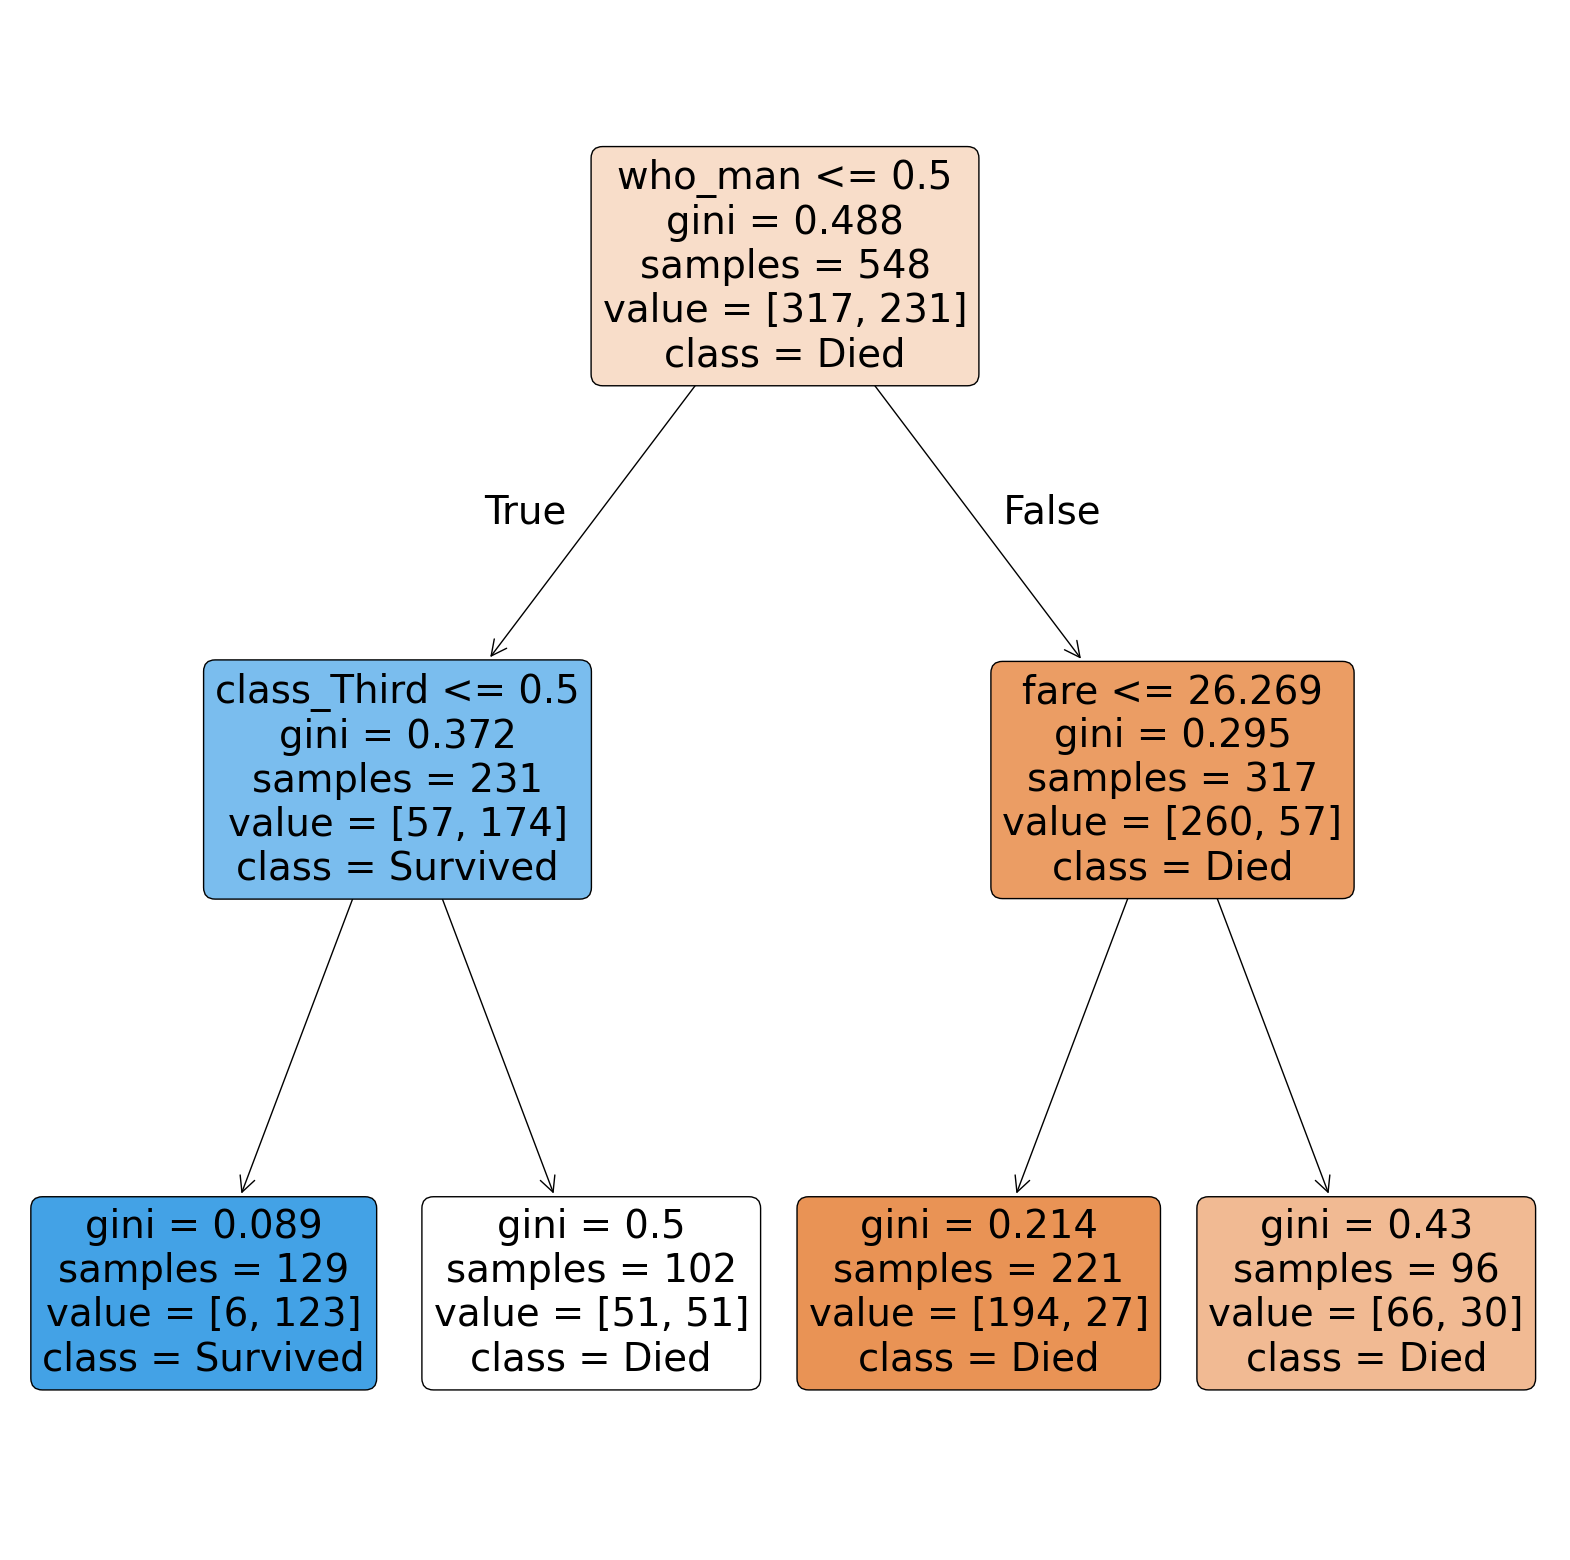

In [254]:
plt.figure(figsize=[20,20])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Died', 'Survived'],
          feature_names=list(x_train.columns));

In [269]:
# Post Pruning

clf = DecisionTreeClassifier(random_state=100)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [273]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=100, 
                                 ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

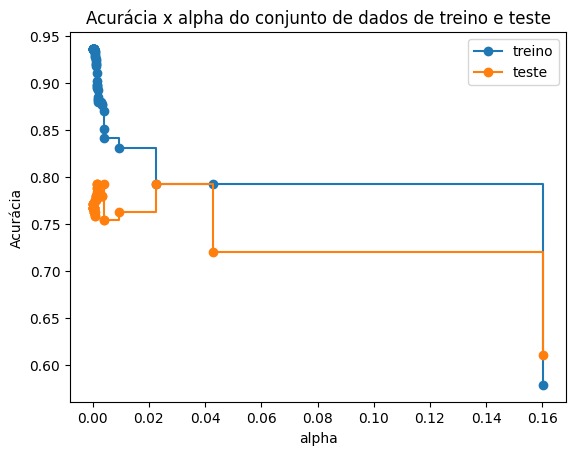

In [279]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', 
        label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [281]:
pd.DataFrame({'alpha': ccp_alphas.tolist(), 
              'score': test_scores})

,alpha,score
0,0.000000,0.771186
1,0.000028,0.771186
2,0.000065,0.771186
3,0.000115,0.771186
4,0.000116,0.771186
5,0.000122,0.766949
6,0.000122,0.766949
7,0.000122,0.766949
8,0.000142,0.766949
9,0.000162,0.766949


In [285]:
clf_pruned = DecisionTreeClassifier(random_state = 100,
                                    ccp_alpha = 0.022588)

0.7923728813559322

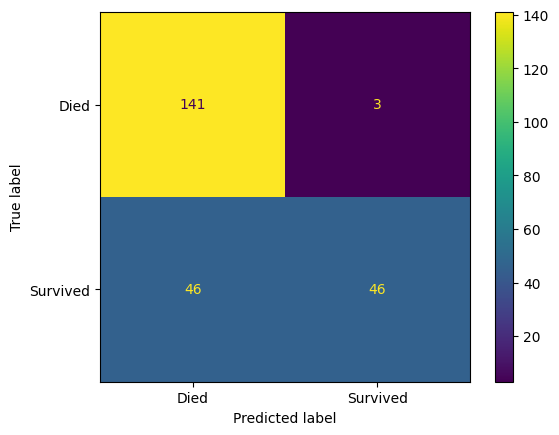

In [297]:
clf_pruned.fit(x_train, y_train)
preditc = clf_pruned.predict(x_test)
ConfusionMatrixDisplay.from_estimator(clf_pruned, x_test, y_test, display_labels=['Died', 'Survived']);
accuracy_score(y_test, predict)